# Anyone AI

# Project III - Home Credit Default Risk

You've been learning a lot about Machine Learning Algorithms, now we you're gonna be asked to put it all together. 

You will create a complete pipeline to preprocess the data, train your model and then predict values for the [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/) Kaggle competition.

## Introduction

Kaggle is a web platform and community for data scientist and machine learning engineers where competetitions and datasets are regularly published.

This particular competition is a binary Classification task: we want to predict whether the person applying for a home credit will be able to repay its debt or not. The competition finished 4 years ago, so you will find a lot of blog posts and code written for it, we encourage you to read everything you can about it.

The dataset is composed of multiple files with different information about loands taken. In this project we're going to exclusively work with the main files: application_train.csv and application_test.csv.

The competition uses [Area Under the ROC Curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es_419) as the evaluation metric, so our models will have to return the probabilities that a loan is not paid for each row.

### Getting the data

1- Login to Kaggle (if you don't have an account you'll have to register to get it) and download the [complete dataset](https://www.kaggle.com/competitions/home-credit-default-risk/data). Read the information about the data. What does a row in the main file represent? What does the target variable means?

One row represents one loan in our data sample.
The target variable says wether the loan was repaid (0) or not (1)

In [ ]:
### Importing all the libraries needed for this project

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import json
from google.colab import files
from time import time

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn import tree
from sklearn.svm import SVC

from scipy.stats import uniform
from scipy.stats import truncnorm
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

#import warnings
#warnings.filterwarnings('ignore')

2- Load the training and test datasets, we're only going to work withe "application_train.csv" and "application_test.csv" for now

In [ ]:
### Complete in this cell: Loading the dataset

# RULES for the USER
# 1.- In order to be able to load the datasets, the user must have a kaggle account
# 2.- Inside your kaggle user account configuration, you will see the "Create new API token" button, click on
# 3.- You will see the file "kaggle.json" downloaded in your computer, you will need to select it into this tab when been requested

!pip install -q kaggle
import json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"luchopenaloza","key":"e292e5184284a63f27b8243e45819263"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c home-credit-default-risk
!mkdir home-credit-default-risk
!unzip home-credit-default-risk.zip -d home-credit-default-risk

 99% 682M/688M [00:12<00:00, 51.5MB/s]
100% 688M/688M [00:12<00:00, 58.8MB/s]
Archive:  home-credit-default-risk.zip
  inflating: home-credit-default-risk/HomeCredit_columns_description.csv  
  inflating: home-credit-default-risk/POS_CASH_balance.csv  
  inflating: home-credit-default-risk/application_test.csv  
  inflating: home-credit-default-risk/application_train.csv  
  inflating: home-credit-default-risk/bureau.csv  
  inflating: home-credit-default-risk/bureau_balance.csv  
  inflating: home-credit-default-risk/credit_card_balance.csv  
  inflating: home-credit-default-risk/installments_payments.csv  
  inflating: home-credit-default-risk/previous_application.csv  
  inflating: home-credit-default-risk/sample_submission.csv  


In [ ]:
train_data = pd.read_csv("/content/home-credit-default-risk/application_train.csv")
test_data = pd.read_csv("/content/home-credit-default-risk/application_test.csv")

In [ ]:
#train_data
#test_data

### Exploratory Data Analysis

A lot of the analysis of the data can be found on public available Kaggle kernels or blog posts, but you need to make sure you understand the datasets properties before starting working on it, so we'll do exploratory data analysis for the main files

**Dataset Basics**

1- Show the shape of the training and test datasets.

In [ ]:
### Complete in this cell: shape of the dataset
print("The shape of training data is:",train_data.shape)
print("The shape of test data is:",test_data.shape)

The shape of training data is: (307511, 122)
The shape of test data is: (48744, 121)


2- List all columns in the train dataset

In [ ]:
### Complete in this cell: Show all columns in the training dataset 
list(train_data)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

3- Show the first 5 records of the training dataset, transpose the dataframe to see each record as a column and features as rows, make sure all features are visualized. Take your time to review what kind of information you can gather from this data.

In [ ]:
# Allow pandas to show us all the table
#pd.options.display.max_rows
pd.set_option("display.max_rows", 999)
#pd.options.display.max_columns
pd.set_option('display.max_columns', 999)

In [ ]:
#pd.reset_option("display.max_rows")
#pd.options.display.max_rows

In [ ]:
#pd.reset_option("display.max_columns")
#pd.options.display.max_columns

In [ ]:
### Complete in this cell: show first 5 records in a transposed table
train_data.head().T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5,21865.5


4- Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

In [ ]:
### Complete in this cell: show distribution of target variable
dist_train = pd.DataFrame(train_data["TARGET"].value_counts(dropna=False))
dist_train.rename(columns = {'TARGET':'COUNT'}, inplace = True)
dist_train["%"] = round((dist_train["COUNT"] / dist_train["COUNT"].sum())*100,2)
dist_train

,COUNT,%
0,282686,91.93
1,24825,8.07


In [ ]:
print("The total value count of the target variable values is:", dist_train["COUNT"].sum())

The total value count of the target variable values is: 307511


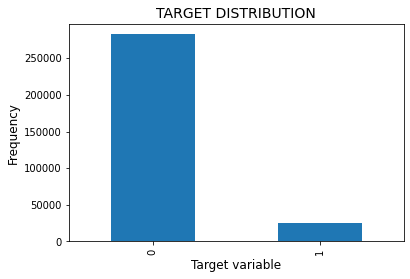

In [ ]:
train_data["TARGET"].value_counts().plot(kind='bar')
plt.title("TARGET DISTRIBUTION", fontsize=14)
plt.xlabel("Target variable", fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

5- Show the number of columns of each data type

In [ ]:
### Complete in this cell: show number of columns per data type
print("Number of columns of each data type in Train data:")
print(train_data.dtypes.value_counts(dropna=False))
print()
print("Number of columns of each data type in Test data:")
print(test_data.dtypes.value_counts(dropna=False))

Number of columns of each data type in Train data:
float64    65
int64      41
object     16
dtype: int64

Number of columns of each data type in Test data:
float64    65
int64      40
object     16
dtype: int64


6- For categorical variables, show the number of distinct values in each column (number of labels)

In [ ]:
# Some code lines to see certain info
#train_data["EMERGENCYSTATE_MODE"].unique()
#train_data.dtypes
#educ_train["COUNT"].sum()
#train_data.shape[0]

In [ ]:
### Complete in this cell: show number of unique values per categorical column in TRAIN data
train_1 = pd.DataFrame(train_data.nunique())
train_2 = pd.DataFrame(train_data.dtypes)
train_3 = pd.concat([train_1, train_2, train_data.head().T], axis=1)
train_3.set_axis(["Count", "Type", "Sample1", "Sample2", "Sample3", "Sample4", "Sample5"], axis=1, inplace=True)
train_4 = train_3.loc[(train_3["Type"] == "int64") | (train_3["Type"] =="object")]
train_numb_labels = train_4.drop(["SK_ID_CURR","CNT_CHILDREN","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH"])
train_numb_labels = train_numb_labels.drop(["Type","Sample1","Sample2","Sample3","Sample4","Sample5"], axis=1)
train_numb_labels.T

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
Count,2,2,3,2,2,7,8,5,6,6,2,2,2,2,2,2,18,3,3,7,24,2,2,2,2,2,2,58,4,3,7,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
### Complete in this cell: show number of unique values per categorical column in TEST data
test_1 = pd.DataFrame(test_data.nunique())
test_2 = pd.DataFrame(test_data.dtypes)
test_3 = pd.concat([test_1, test_2, test_data.head().T], axis=1)
test_3.set_axis(["Count", "Type", "Sample1", "Sample2", "Sample3", "Sample4", "Sample5"], axis=1, inplace=True)
test_4 = test_3.loc[(test_3["Type"] == "int64") | (test_3["Type"] =="object")]
test_numb_labels = test_4.drop(["SK_ID_CURR","CNT_CHILDREN","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH"])
test_numb_labels = test_numb_labels.drop(["Type","Sample1","Sample2","Sample3","Sample4","Sample5"], axis=1)
test_numb_labels.T

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
Count,2,2,2,2,7,7,5,5,6,2,2,2,2,2,2,18,3,4,7,24,2,2,2,2,2,2,58,4,3,7,2,1,2,2,2,2,2,2,2,1,2,1,1,1,1,1,1,2,1,1,1


7- Analyzing missing data: show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)

In [ ]:
### Complete in this cell: checking missing data in TRAIN data
miss_train = pd.DataFrame(train_data.isna().sum())
miss_train.rename(columns = {0:'COUNT'}, inplace = True)
miss_train["%"] = round((miss_train["COUNT"] / train_data.shape[0])*100,2)
miss_train_sort = miss_train.sort_values("%", ascending=False)
miss_train_sort.head(20)

,COUNT,%
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35


In [ ]:
### Complete in this cell: checking missing data in TEST data
miss_test = pd.DataFrame(test_data.isna().sum())
miss_test.rename(columns = {0:'COUNT'}, inplace = True)
miss_test["%"] = round((miss_test["COUNT"] / test_data.shape[0])*100,2)
miss_test_sort = miss_test.sort_values("%", ascending=False)
miss_test_sort.head(20)

,COUNT,%
COMMONAREA_AVG,33495,68.72
COMMONAREA_MODE,33495,68.72
COMMONAREA_MEDI,33495,68.72
NONLIVINGAPARTMENTS_AVG,33347,68.41
NONLIVINGAPARTMENTS_MODE,33347,68.41
NONLIVINGAPARTMENTS_MEDI,33347,68.41
FONDKAPREMONT_MODE,32797,67.28
LIVINGAPARTMENTS_AVG,32780,67.25
LIVINGAPARTMENTS_MODE,32780,67.25
LIVINGAPARTMENTS_MEDI,32780,67.25


**Analyzing distribution of variables**

1- Show the distribution of credit amounts

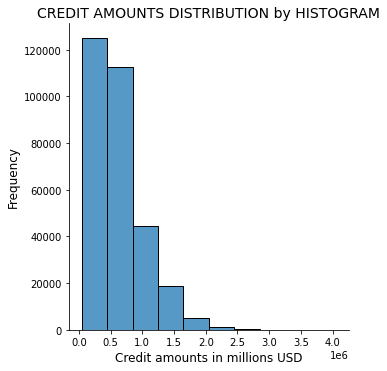

In [ ]:
### Complete in this cell: distribution of credit amounts in TRAIN data
sns.displot(data=train_data, x="AMT_CREDIT", bins=10)
plt.title("CREDIT AMOUNTS DISTRIBUTION by HISTOGRAM", fontsize=14)
plt.xlabel("Credit amounts in millions USD", fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

2- Plot the education level of the credit applicants, show the percentages of each category. Also print the total counts for each category.

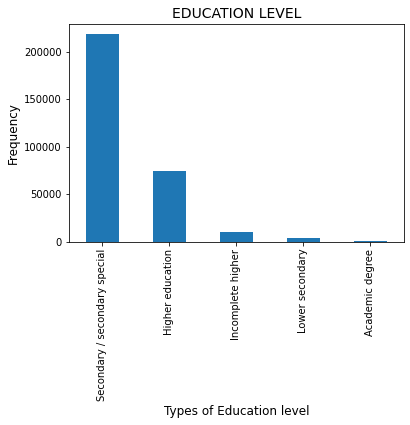

In [ ]:
### Complete in this cell: level of education plot in TRAIN data
train_data["NAME_EDUCATION_TYPE"].value_counts(dropna=False).plot(kind='bar')
plt.title("EDUCATION LEVEL", fontsize=14)
plt.xlabel("Types of Education level", fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:
educ_train = pd.DataFrame(train_data["NAME_EDUCATION_TYPE"].value_counts(dropna=False))
educ_train.rename(columns = {'NAME_EDUCATION_TYPE':'COUNT'}, inplace = True)
educ_train["%"] = round((educ_train["COUNT"] / train_data.shape[0])*100,2)
educ_train

,COUNT,%
Secondary / secondary special,218391,71.02
Higher education,74863,24.34
Incomplete higher,10277,3.34
Lower secondary,3816,1.24
Academic degree,164,0.05


3- Plot the distribution of ocupation of the loan applicants

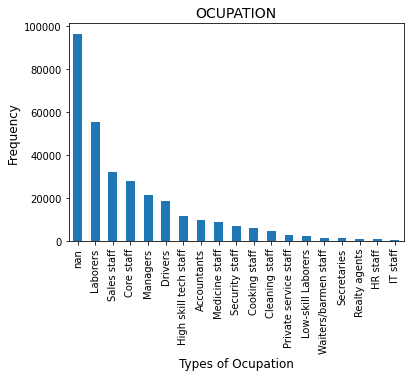

In [ ]:
### Complete in this cell: ocupation of applicants in TRAIN data
train_data["OCCUPATION_TYPE"].value_counts(dropna=False).plot(kind='bar')
plt.title("OCUPATION", fontsize=14)
plt.xlabel("Types of Ocupation", fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:
ocup_train = pd.DataFrame(train_data["OCCUPATION_TYPE"].value_counts(dropna=False))
ocup_train.rename(columns = {'OCCUPATION_TYPE':'COUNT'}, inplace = True)
ocup_train["%"] = round((ocup_train["COUNT"] / train_data.shape[0])*100,2)
ocup_train

,COUNT,%
NaN,96391,31.35
Laborers,55186,17.95
Sales staff,32102,10.44
Core staff,27570,8.97
Managers,21371,6.95
Drivers,18603,6.05
High skill tech staff,11380,3.70
Accountants,9813,3.19
Medicine staff,8537,2.78
Security staff,6721,2.19


4- Plot the family status of the applicants

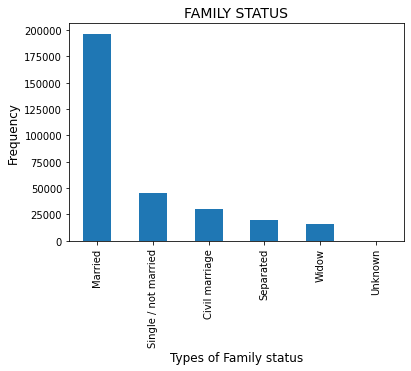

In [ ]:
### Complete in this cell: family status in TRAIN data
train_data["NAME_FAMILY_STATUS"].value_counts(dropna=False).plot(kind='bar')
plt.title("FAMILY STATUS", fontsize=14)
plt.xlabel("Types of Family status", fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:
famstat_train = pd.DataFrame(train_data["NAME_FAMILY_STATUS"].value_counts(dropna=False))
famstat_train.rename(columns = {'NAME_FAMILY_STATUS':'COUNT'}, inplace = True)
famstat_train["%"] = round((famstat_train["COUNT"] / famstat_train["COUNT"].sum())*100,2)
famstat_train

,COUNT,%
Married,196432,63.88
Single / not married,45444,14.78
Civil marriage,29775,9.68
Separated,19770,6.43
Widow,16088,5.23
Unknown,2,0.00


5- Plot the income type of applicants grouped by the target variable

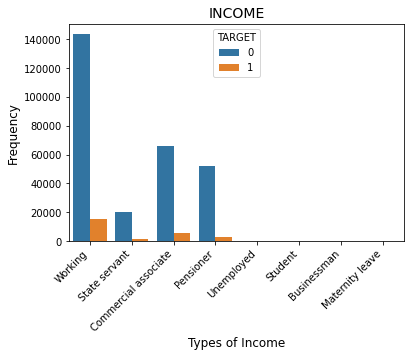

In [ ]:
### Complete in this cell: Income type of applicants by target variable in TRAIN data
ploty = sns.countplot(data=train_data, x="NAME_INCOME_TYPE", hue="TARGET")
ploty.set_xticklabels(ploty.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("INCOME", fontsize=14)
plt.xlabel("Types of Income", fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## Preprocessing

In this section, you will code a function to make all the data pre processing for the dataset. What you have to deliver is a function that takes the train and test dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training.

The function should perform these activities:

- Correct outliers/anomalous values in numerical columns (hint: take a look at the DAYS_EMPLOYED column)
- Impute values for all columns with missing data (use median as imputing value)
- Encode categorical features:
    - If feature has 2 categories encode using binary encoding
    - More than 2 categories, use one hot encoding 
- Feature scaling

Keep in mind that you could get different number of columns in train and test because some category could only be present in one of the dataframes, this could create more one hot encoded columns. You should align train and test to have the same number of columns

In [ ]:
### Complete in this cell: Data pre processing function

def pre_process_datasets(train_data, test_data):

    X_train = train_data.drop(["SK_ID_CURR", "TARGET"],axis=1)
    X_test = test_data.drop(["SK_ID_CURR"],axis=1)


    # PREPROCESSING TRAIN DATA

    # Managing outliers in TRAIN data: DAYS_EMPLOYED
    X_train.loc[X_train["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"] = None

    # Managing outliers in TRAIN data: OWN_CAR_AGE
    X_train['OWN_CAR_AGE'].mask(X_train['OWN_CAR_AGE'] == 91, None, inplace=True)

    # Managing outliers in TRAIN data: OBS_30_CNT_SOCIAL_CIRCLE
    X_train['OBS_30_CNT_SOCIAL_CIRCLE'].mask(X_train['OBS_30_CNT_SOCIAL_CIRCLE'] == 348, None, inplace=True)

    # Managing outliers in TRAIN data: DEF_30_CNT_SOCIAL_CIRCLE
    X_train['DEF_30_CNT_SOCIAL_CIRCLE'].mask(X_train['DEF_30_CNT_SOCIAL_CIRCLE'] == 34, None, inplace=True)

    # Managing outliers in TRAIN data: OBS_60_CNT_SOCIAL_CIRCLE
    X_train['OBS_60_CNT_SOCIAL_CIRCLE'].mask(X_train['OBS_60_CNT_SOCIAL_CIRCLE'] == 344, None, inplace=True)

    # Managing outliers in TRAIN data: DEF_60_CNT_SOCIAL_CIRCLE
    X_train['DEF_60_CNT_SOCIAL_CIRCLE'].mask(X_train['DEF_60_CNT_SOCIAL_CIRCLE'] == 24, None, inplace=True)

    # Managing outliers in TRAIN data: AMT_REQ_CREDIT_BUREAU_QRT
    X_train['AMT_REQ_CREDIT_BUREAU_QRT'].mask(X_train['AMT_REQ_CREDIT_BUREAU_QRT'] == 261, None, inplace=True)

    # Imput median to nan values in numeric columns
    data_numeric_train = X_train._get_numeric_data()
    cols_numeric_train = list(data_numeric_train.columns)

    imputer_median = SimpleImputer(missing_values=np.NaN, strategy="median")
    imputer_median.fit(X_train[cols_numeric_train].values)
    X_train[cols_numeric_train] = imputer_median.transform(X_train[cols_numeric_train].values)

    # Imput mode to nan values in object columns
    cols_object_train = list(set(list(X_train.columns)) - set(list(data_numeric_train.columns)))

    imputer_mode = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")
    imputer_mode.fit(X_train[cols_object_train].values)
    X_train[cols_object_train] = imputer_mode.transform(X_train[cols_object_train].values)

    # Managing XNA in GENDER of TRAIN data to encode after this
    X_train['CODE_GENDER'].mask(X_train['CODE_GENDER'] == 'XNA', 'F', inplace=True)

    # Do it a intern copy in case of manteinance
    X_train1 = X_train.copy()

    # Doing the encode into the categorical columns
    le_two = LabelEncoder()
    encoder_hot = OneHotEncoder(sparse=False)

    for col in cols_object_train:

        if len(list(X_train1[col].unique())) <= 2:
            le_two.fit(X_train1[col])
            X_train1[col] = le_two.transform(X_train1[col])
            
        else:
            var_encoded = pd.DataFrame(encoder_hot.fit_transform(X_train1[[col]]))
            var_encoded.columns = encoder_hot.get_feature_names_out()
            X_train1.drop([col], axis=1, inplace=True)
            X_train1 = pd.concat([X_train1, var_encoded], axis=1)


    # PREPROCESSING TEST DATA

    # Managing outliers in TEST data: DAYS_EMPLOYED
    X_test.loc[X_test["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"] = None

    # Managing outliers in TEST data: OWN_CAR_AGE
    X_test['OWN_CAR_AGE'].mask(X_test['OWN_CAR_AGE'] == 65, None, inplace=True)

    # Managing outliers in TEST data: REGION_RATING_CLIENT_W_CITY
    X_test['REGION_RATING_CLIENT_W_CITY'].mask(X_test['REGION_RATING_CLIENT_W_CITY'] == -1, None, inplace=True)

    # Managing outliers in TEST data: OBS_30_CNT_SOCIAL_CIRCLE
    X_test['OBS_30_CNT_SOCIAL_CIRCLE'].mask(X_test['OBS_30_CNT_SOCIAL_CIRCLE'] == 352, None, inplace=True)
    X_test['OBS_30_CNT_SOCIAL_CIRCLE'].mask(X_test['OBS_30_CNT_SOCIAL_CIRCLE'] == 353, None, inplace=True)
    X_test['OBS_30_CNT_SOCIAL_CIRCLE'].mask(X_test['OBS_30_CNT_SOCIAL_CIRCLE'] == 354, None, inplace=True)

    # Managing outliers in TEST data: DEF_30_CNT_SOCIAL_CIRCLE
    X_test['DEF_30_CNT_SOCIAL_CIRCLE'].mask(X_test['DEF_30_CNT_SOCIAL_CIRCLE'] == 34, None, inplace=True)

    # Managing outliers in TEST data: OBS_60_CNT_SOCIAL_CIRCLE
    X_test['OBS_60_CNT_SOCIAL_CIRCLE'].mask(X_test['OBS_60_CNT_SOCIAL_CIRCLE'] == 349, None, inplace=True)
    X_test['OBS_60_CNT_SOCIAL_CIRCLE'].mask(X_test['OBS_60_CNT_SOCIAL_CIRCLE'] == 351, None, inplace=True)

    # Managing outliers in TEST data: DEF_60_CNT_SOCIAL_CIRCLE
    X_test['DEF_60_CNT_SOCIAL_CIRCLE'].mask(X_test['DEF_60_CNT_SOCIAL_CIRCLE'] == 24, None, inplace=True)

    # Imput median to nan values in numeric columns
    data_numeric_test = X_test._get_numeric_data()
    cols_numeric_test = list(data_numeric_test.columns)

    X_test[cols_numeric_test] = imputer_median.transform(X_test[cols_numeric_test].values)

    # Imput mode to nan values in object columns
    cols_object_test = list(set(list(X_train.columns)) - set(list(data_numeric_test.columns)))

    X_test[cols_object_test] = imputer_mode.transform(X_test[cols_object_test].values)

    # Do it a intern copy in case of manteinance
    X_test1 = X_test.copy()

    # Doing the encode into the categorical columns
    for col in cols_object_test:

        if len(list(X_test1[col].unique())) <= 2:
            le_two.fit(X_test1[col])
            X_test1[col] = le_two.transform(X_test1[col])
            
        else:
            var_encoded = pd.DataFrame(encoder_hot.fit_transform(X_test1[[col]]))
            var_encoded.columns = encoder_hot.get_feature_names_out()
            X_test1.drop([col], axis=1, inplace=True)
            X_test1 = pd.concat([X_test1, var_encoded], axis=1)

    
    # FINAL PROCEDURES OF PREPROCESSING
    
    # Do it a intern copy in case of manteinance
    X_train2 = X_train1.copy()
    X_test2 = X_test1.copy()

    # Align the two datasets in order to have the same number of columns
    X_train2, X_test2 = X_train2.align(X_test2, axis = 1)

    # Giving the value of zero to the new two columns in the TEST dataset
    X_test2['NAME_FAMILY_STATUS_Unknown'] = X_test2['NAME_FAMILY_STATUS_Unknown'].fillna(0)
    X_test2['NAME_INCOME_TYPE_Maternity leave'] = X_test2['NAME_INCOME_TYPE_Maternity leave'].fillna(0)

    # Do it a intern copy in case of manteinance
    X_train3 = X_train2.copy()
    X_test3 = X_test2.copy()

    cols_train3 = list(X_train3.columns)
    cols_test3 = list(X_test3.columns)

    # Doing the scale transform to our two datasets

    mm_scaler = MinMaxScaler(feature_range=(0, 1))

    mm_scaler.fit(X_train3.values)
    X_train3 = mm_scaler.transform(X_train3.values)
    X_test3 = mm_scaler.transform(X_test3.values)

    return X_train3, X_test3

In [ ]:
X_train, X_test = pre_process_datasets(train_data, test_data)

## Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

### Baseline: LogisticRegression

1- Import LogisticRegression from sklearn and train a model using the preprocesed train data from the previous section, and just default parameters. If you receive a warning because the algorithm failed to converge, try increasing the number of iterations or decreasing the C parameter 

In [ ]:
# Converting our target into numpy array
y_train = train_data["TARGET"].values

In [ ]:
### Complete in this cell: train a logistic regression
model_log_reg = LogisticRegression(C=0.05, max_iter=5000, random_state=12)

model_log_reg.fit(X_train, y_train)

LogisticRegression(C=0.05, max_iter=5000, random_state=12)

2- Use the trained model to predict probabilites for the test data, and then save the results to a csv in the format expected in the competition: a SK_ID_CURR column and a TARGET column with probabilities. REMEMBER: the TARGET columns should ONLY contain the probabilities that the debt is not repaid (equivalent to the class 1).

In [ ]:
### Complete in this cell: predict test data and save csv
y_log_reg_pred = model_log_reg.predict_proba(X_test)

# Preparing the final result
result_log_reg = pd.DataFrame(test_data["SK_ID_CURR"])
result_log_reg["TARGET"] = y_log_reg_pred[:,1]

result_log_reg.to_csv("baseline_log_reg_dflt.csv", index=False)

3- Go to the Kaggle competition, and in the [submissions page](https://www.kaggle.com/competitions/home-credit-default-risk/submit) load your csv file. Report here the result in the private score you obtained.

In [ ]:
print("Using the Logistic Regression model with default hyperparameters,")
print("the private score I obtained in Kaggle was: 0.73059")

Using the Logistic Regression model with default hyperparameters,
the private score I obtained in Kaggle was: 0.73059


At this point, the model should produce a result around 0.67 

### Training a Random Forest Classifier 

You're gonna start working in more complex models: ensambles, particularly, you're going to use the Random Forest Classifier from Scikit Learn. 

1- Train a RandomForestClassifier, print the time taken by the fit function. Just use default hyperparameters, except for n_jobs, which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

In [ ]:
### Complete in this cell: train a RandomForestClassifier
model_rand_forest = RandomForestClassifier(n_jobs=-1, verbose=1, random_state=12)

model_rand_forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomForestClassifier(n_jobs=-1, random_state=12, verbose=1)

2- Use the classifier to predict probabilities on the test set, and save the results to a csv file.

In [ ]:
### Complete in this cell: predict test data and save csv
y_rand_forest_pred = model_rand_forest.predict_proba(X_test)

# Preparing the final result
result_rand_forest = pd.DataFrame(test_data["SK_ID_CURR"])
result_rand_forest["TARGET"] = y_rand_forest_pred[:,1]

result_rand_forest.to_csv("rand_forest_dflt.csv", index=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.9s finished


3- Load the predictions to the competition. Report the private score here.

In [ ]:
### Complete in this cell: report your score on Kaggle
# This model should have a private score around 0.68 
print("Using the Random Forest Classifier model with default hyperparameters,")
print("the private score I obtained in Kaggle was: 0.68972")

Using the Random Forest Classifier model with default hyperparameters,
the private score I obtained in Kaggle was: 0.68972


### Randomized Search with Cross Validation

So far, we've only created models using the default hyperparameters of each algorithm. This is usually something that we would only do for baseline models, hyperparameter tuning is a very important part of the modeling process and is often the difference between having an acceptable model or not.

But, there are usually lots of hyperparameters to tune and a finite amount of time to do it, you have to consider the time and resources it takes to find an optimal combination of them. In the previous section you trained a random forest classifier and saw how much it took to train it once in your PC. If you want to do hyperparameter optimization you now have to consider that you will have to train the algorithm N number of times, with N being the cartesian product of all parameters. 

Furthermore, you can't validate the performance of your trained models on the test set, as this data should only be used to validate the final model. So we have to implement a validation strategy, K-Fold Cross Validation being the most common. But this also adds time complexity to our training, because we will have to train each combinations of hyperparameters M number of times, X being the number of folds in which we divided our dataset, so the total number of training iterations will be NxM... this resulting number can grow VERY quickly.

Fortunately there are strategies to mitigate this, here you're going to select a small number of hyperparameters to test a RandomForestClassifier, and use a Randomized Search algorithm with K-Fold Cross Validation to avoid doing a full search across the grid. 

Remember: take in consideration how much time it took to train a single classifier, and define the number of cross validations folds and iterations of the search accordingly. 
A recommendation: run the training process, go make yourself a cup of coffee, sit somewhere comfortably and forget about it for a while.


1- Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier. The validation metric used to evaluate the models should be "roc_auc".

In [ ]:
### Complete in this cell: Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier
example_hyperparameter_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200]
}

In [ ]:
model_rand_forest_srCV = RandomForestClassifier(n_jobs=-1, random_state=12)

rand_search_CV = RandomizedSearchCV(model_rand_forest_srCV, example_hyperparameter_grid, scoring="roc_auc", random_state=12)
rand_search_CV.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=12),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=12, scoring='roc_auc')

In [ ]:
rand_search_CV.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
rand_search_CV.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

In [ ]:
pd.DataFrame(rand_search_CV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,480.292175,28.728594,3.855343,0.105322,200,5,1,sqrt,100,False,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.725470,0.724963,0.721167,0.725539,0.721545,0.723737,0.001958,6
1,259.183964,2.863150,1.809135,0.084469,100,10,1,auto,None,False,"{'n_estimators': 100, 'min_samples_split': 10,...",0.721037,0.722900,0.715468,0.723298,0.716788,0.719898,0.003199,9
2,342.140338,10.191747,3.556723,0.127185,200,2,2,sqrt,None,True,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.728536,0.728523,0.723812,0.727526,0.723766,0.726432,0.002189,4
3,191.357052,2.464862,1.910227,0.081024,200,10,2,auto,10,True,"{'n_estimators': 200, 'min_samples_split': 10,...",0.731842,0.735799,0.729343,0.732480,0.733216,0.732536,0.002088,1
4,183.686663,1.882077,1.832122,0.225082,100,10,1,sqrt,100,True,"{'n_estimators': 100, 'min_samples_split': 10,...",0.717517,0.718746,0.711050,0.717007,0.715355,0.715935,0.002674,10
5,537.143194,6.415556,3.294082,0.107718,200,10,1,auto,100,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.727052,0.728567,0.720925,0.727703,0.722996,0.725448,0.002961,5
6,241.844246,2.573201,1.713189,0.078367,100,5,4,auto,50,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.735229,0.730492,0.729654,0.731306,0.731537,0.731644,0.001911,2
7,364.551081,6.104129,3.453699,0.155962,200,5,1,auto,100,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.722493,0.723752,0.717698,0.721385,0.719837,0.721033,0.002107,8
8,174.397269,2.230616,1.589038,0.080991,100,10,2,sqrt,None,True,"{'n_estimators': 100, 'min_samples_split': 10,...",0.724006,0.725907,0.718119,0.722299,0.718028,0.721672,0.003152,7
9,165.549253,0.460429,1.530295,0.040803,100,10,4,sqrt,100,True,"{'n_estimators': 100, 'min_samples_split': 10,...",0.729657,0.732394,0.725279,0.727978,0.726788,0.728419,0.002451,3


2- Use the classifier to predict probabilities on the test set, and save the results to a csv file.

In [ ]:
### Complete in this cell: predict test data and save csv
y_rand_search_CV_pred = rand_search_CV.predict_proba(X_test)

# Preparing the final result
result_rand_search_CV = pd.DataFrame(test_data["SK_ID_CURR"])
result_rand_search_CV["TARGET"] = y_rand_search_CV_pred[:,1]

result_rand_search_CV.to_csv("rand_forest_randsearchcv.csv", index=False)

3- Load the predictions to the competition. Report the private score here.

In [ ]:
### Complete in this cell: report your score on Kaggle
# This model should have a private score around 0.70
print("Using the RandomizedSearchCV to find the best combination of hyperparameters for a Random Forest Classifier model,")
print("the private score I obtained in Kaggle was: 0.71985")

Using the RandomizedSearchCV to find the best combination of hyperparameters for a Random Forest Classifier model,
the private score I obtained in Kaggle was: 0.71985


4- If you have the time and resources, you can train the model for longer iterations, or select more estimator sizes. This is optional, but if you, we would love to see your results.

In [ ]:
###

### Optional: Training a LightGBM model 

Gradient Boosting Machine is one of the most used machine learning algorithms for tabular data. Lots of competitions have been won using models from libraries like XGBoost or LightGBM. You can try using [LightGBM](https://lightgbm.readthedocs.io/en/latest/) to train a new model an see how it performs compared to the other classifiers you trained. 

In [ ]:
### Complete in this cell: train a LightGBM model

# Importing the libraries needed for this point
import lightgbm as lgb

# Train a lightGBM classifier model
model_lightGBM_class = lgb.LGBMClassifier()
model_lightGBM_class.fit(X_train, y_train)

### Complete in this cell: predict test data and save csv
y_lightGBM_class_pred = model_lightGBM_class.predict_proba(X_test)

# Preparing the final result
result_lightGBM_class = pd.DataFrame(test_data["SK_ID_CURR"])
result_lightGBM_class["TARGET"] = y_lightGBM_class_pred[:,1]

result_lightGBM_class.to_csv("lightGBM_class_dflt.csv", index=False)

In [ ]:
print("Using the LightGBM Classifier model with default hyperparameters,")
print("the private score I obtained in Kaggle was: 0.74215")

Using the LightGBM Classifier model with default hyperparameters,
the private score I obtained in Kaggle was: 0.74215


In [ ]:
### Complete in this cell: train a XGBoost model

# Importing the libraries needed for this point
import xgboost as xgb

# Train a XGBoost classifier model
model_XGBoost_class = xgb.XGBClassifier()
model_XGBoost_class.fit(X_train, y_train)

### Complete in this cell: predict test data and save csv
y_XGBoost_class_pred = model_XGBoost_class.predict_proba(X_test)

# Preparing the final result
result_XGBoost_class = pd.DataFrame(test_data["SK_ID_CURR"])
result_XGBoost_class["TARGET"] = y_XGBoost_class_pred[:,1]

result_XGBoost_class.to_csv("XGBoost_class_dflt.csv", index=False)

In [ ]:
print("Using the XGBoost Classifier model with default hyperparameters,")
print("the private score I obtained in Kaggle was: 0.73509")

Using the XGBoost Classifier model with default hyperparameters,
the private score I obtained in Kaggle was: 0.73509
